# Assignment 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
Solving 1D linear advection equation. Initially, the wave is a **triangular pulse** with **height 1** and **width 0.05, centred at x = 0.5** 

In [2]:
def u_init_1(u, x, dx, height, width, center=0.5):

    # for initialising 
    
    nx = len(x)
    
    center_idx = np.argmin(np.abs(x - center))
    half_width_idx = int(np.round(width/(2*dx)))
    
    start = max(0, center_idx - half_width_idx)
    end = min(nx-1, center_idx + half_width_idx)
    
    for i in range(start, center_idx+1):
        u[0,i] = height * (x[i] - x[start])/(x[center_idx] - x[start])
    
    for i in range(center_idx+1, end+1):
        u[0,i] = height * (x[end] - x[i])/(x[end] - x[center_idx])
    
    return u

In [3]:
def true_solution(x,t,width,center):

    # finds true solution
    
    u_true = np.zeros_like(x)
    shifted_center = center + t
    
    left_edge = shifted_center - width / 2
    right_edge = shifted_center + width / 2

    for i in range(len(x)):
        if left_edge <= x[i] <= shifted_center:
            u_true[i] = (x[i] - left_edge) / (shifted_center - left_edge)
        elif shifted_center < x[i] <= right_edge:
            u_true[i] = (right_edge - x[i]) / (right_edge - shifted_center)
        else:
            u_true[i] = 0.0
    
    return u_true

In [4]:
x_centre = 0.5                         # peak 
width = 0.05                           
height = 1

x_start = 0.4                          # start point
x_end = 0.8                            # end point

dx1 = 0.005
nx1 = int(np.round((x_end - x_start)/dx1)) + 1

x1 = np.linspace(x_start,x_end,nx1)

t_start = 0
t_end = 0.25

dt1 = 0.0025
nt1 = int(np.round((t_end - t_start)/dt1)) + 1

t1 = np.linspace(t_start,t_end,nt1)

In the solution matrix, a particular **row** represents a **time instant** and a **column** represents a particular **position**.

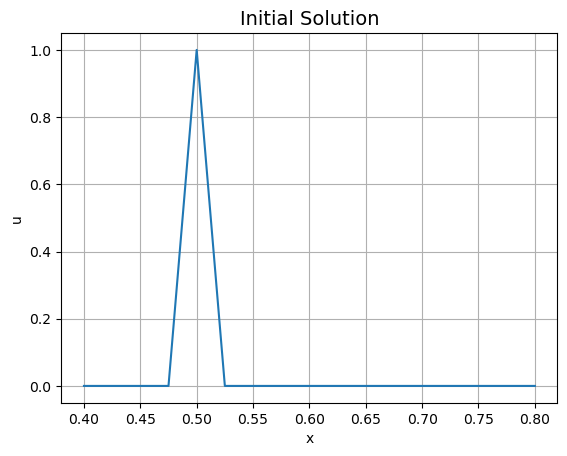

In [5]:
u1 = np.zeros((nt1,nx1))
u1 = u_init_1(u1,x1,dx1,height,width)

plt.title("Initial Solution",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x1,u1[0,:])
plt.grid()
plt.show()

Using **FTBS**&nbsp;scheme $\implies$&nbsp; \
&emsp;&emsp;&emsp;$\triangle x = 0.005$ \
&emsp;&emsp;&emsp;$\triangle t = 0.0025$ \
$$ C = \frac{\triangle t}{\triangle x} = \frac{0.0025}{0.005} = 0.5 \leq 1$$ \
Hence the FTBS scheme is stable.

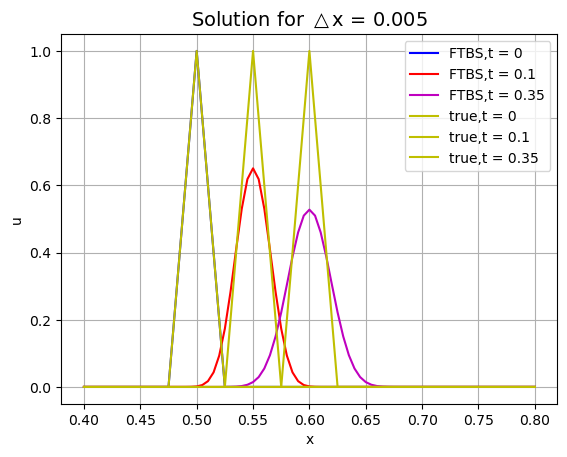

In [6]:
c = dt1/dx1                            # courant's Number

for i in range(nt1 - 1):
    for j in range(1,nx1):
        u1[i + 1, j] = (1 - c) * u1[i,j] + (c * u1[i, j - 1])

u1_true_1 = true_solution(x1,0,0.05,0.5)
u1_true_2 = true_solution(x1,0.05,0.05,0.5)
u1_true_3 = true_solution(x1,0.1,0.05,0.5)

plt.title(rf"Solution for $\triangle$x = {dx1}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x1,u1[0,:],c = 'b',label = 'FTBS,t = 0')
plt.plot(x1,u1[20,:],c = 'r',label = 'FTBS,t = 0.1')
plt.plot(x1,u1[40,:],c = 'm',label = 'FTBS,t = 0.35')
plt.plot(x1,u1_true_1,c = 'y',label = 'true,t = 0')
plt.plot(x1,u1_true_2,c = 'y',label = 'true,t = 0.1')
plt.plot(x1,u1_true_3,c = 'y',label = 'true,t = 0.35')
plt.grid()
plt.legend()
plt.show()

Using **Crank Nicholson** scheme $\implies$

In [7]:
u1_cn = np.zeros((nt1,nx1))
u1_cn = u_init_1(u1_cn,x1,dx1,height,width)

A1 = np.eye(nx1)                         # coefficient matrix for (n + 1)th instance
B1 = np.eye(nx1)                         # coefficient matrix for nth instance

for i in range(nx1):
    if (i != 0 and i != (nx1 - 1)):
        A1[i,i - 1] = -c/4
        B1[i,i - 1] = c/4
        A1[i,i + 1] = c/4
        B1[i,i + 1] = -c/4

for i in range(nt1 - 1):
    constant = B1 @ (u1_cn[i,:].T)
    sol = np.linalg.solve(A1,constant)
    u1_cn[i + 1,:] = sol.T

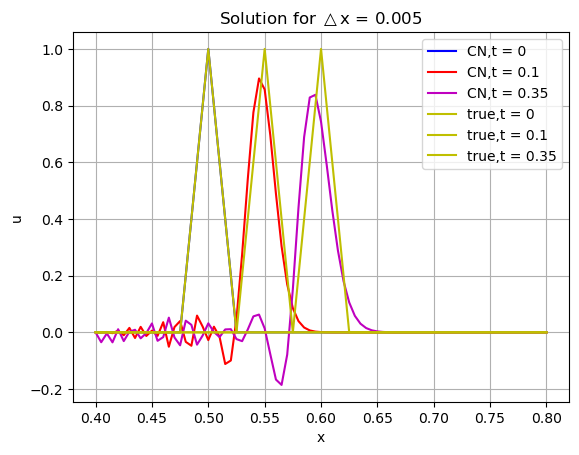

In [8]:
plt.title(rf"Solution for $\triangle$x = {dx1}")
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x1,u1_cn[0,:],c = 'b',label = 'CN,t = 0')
plt.plot(x1,u1_cn[20,:],c = 'r',label = 'CN,t = 0.1')
plt.plot(x1,u1_cn[40,:],c = 'm',label = 'CN,t = 0.35')
plt.plot(x1,u1_true_1,c = 'y',label = 'true,t = 0')
plt.plot(x1,u1_true_2,c = 'y',label = 'true,t = 0.1')
plt.plot(x1,u1_true_3,c = 'y',label = 'true,t = 0.35')
plt.legend()
plt.grid()
plt.show()

**Observation**: \
The Crank Nicholson method showed oscillations at the edges of the waves. <br> 
Both the methods have dispersive and damping errors.

For $\triangle x = 0.0025$&nbsp; and $\triangle t = 0.0025$&nbsp;: 

In [9]:
dx1_2 = 0.0025
nx1_2 = int(np.round((x_end - x_start)/dx1_2)) + 1

x1_2 = np.linspace(x_start,x_end,nx1_2)

t_start = 0
t_end = 0.25

dt1 = 0.0005
nt1 = int(np.round((t_end - t_start)/dt1)) + 1

t1 = np.linspace(t_start,t_end,nt1)

For **FTBS** scheme $\implies$ \
&emsp;&emsp;&emsp;$\triangle x = 0.0025$ \
&emsp;&emsp;&emsp;$\triangle t = 0.0005$ \
$$ C = \frac{\triangle t}{\triangle x} = \frac{0.0005}{0.0025} = 0.2 $$ \
Hence the FTBS scheme is stable.

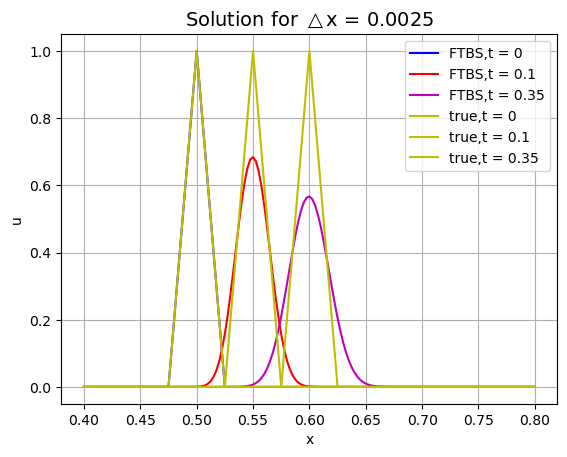

In [10]:
u1_2 = np.zeros((nt1,nx1_2))
u1_2 = u_init_1(u1_2,x1_2,dx1_2,height,width)

c_2 = dt1/dx1_2                            # courant's Number

for i in range(nt1 - 1):
    for j in range(1,nx1_2):
        u1_2[i + 1, j] = (1 - c_2) * u1_2[i,j] + (c_2 * u1_2[i, j - 1])

u1_1_true_1 = true_solution(x1_2,0,0.05,0.5)
u1_1_true_2 = true_solution(x1_2,0.05,0.05,0.5)
u1_1_true_3 = true_solution(x1_2,0.1,0.05,0.5)

plt.title(rf"Solution for $\triangle$x = {dx1_2}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x1_2,u1_2[0,:],c = 'b',label = 'FTBS,t = 0')
plt.plot(x1_2,u1_2[100,:],c = 'r',label = 'FTBS,t = 0.1')
plt.plot(x1_2,u1_2[200,:],c = 'm',label = 'FTBS,t = 0.35')
plt.plot(x1_2,u1_1_true_1,c = 'y',label = 'true,t = 0')
plt.plot(x1_2,u1_1_true_2,c = 'y',label = 'true,t = 0.1')
plt.plot(x1_2,u1_1_true_3,c = 'y',label = 'true,t = 0.35')
plt.grid()
plt.legend()
plt.show()

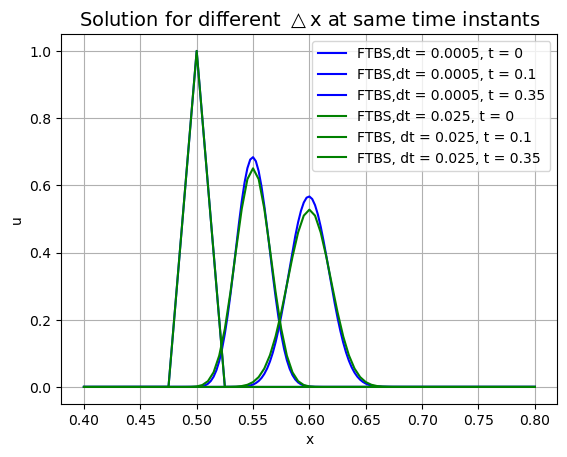

In [11]:
plt.title(rf"Solution for different $\triangle$x at same time instants",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x1_2,u1_2[0,:],c = 'b',label = f'FTBS,dt = 0.0005, t = 0')
plt.plot(x1_2,u1_2[100,:],c = 'b',label = f'FTBS,dt = 0.0005, t = 0.1')
plt.plot(x1_2,u1_2[200,:],c = 'b',label = f'FTBS,dt = 0.0005, t = 0.35')
plt.plot(x1,u1[0,:],c = 'g',label = f'FTBS,dt = 0.025, t = 0')
plt.plot(x1,u1[20,:],c = 'g',label = f'FTBS, dt = 0.025, t = 0.1')
plt.plot(x1,u1[40,:],c = 'g',label = f'FTBS, dt = 0.025, t = 0.35')
plt.grid()
plt.legend()
plt.show()

As the values of $\triangle x$ reduced, the **amplitude** of the wave **reduced** but the **location is same.**

## Question 2

Roll Number : CO23BTECH110**21** &nbsp;$\implies$&nbsp; solving using **FTBS** scheme $\implies$ \
&emsp;&emsp;&emsp;$\triangle x = 0.005$ \
&emsp;&emsp;&emsp;$\triangle t = 0.001$ 

In [12]:
def u_init_2(u,x,centre,height,width):

    # initialisation
    
    left = centre - width/2
    right = centre + width/2
    
    i = (x >= left) & (x <= right)
    left_slope = i & (x <= centre)
    right_slope = i & (x > centre)

    u[0,left_slope] = height * ((x[left_slope] - left)/(centre - left))
    u[0,right_slope] = height * ((x[right_slope] - right)/(centre - right))
    
    return u

In [13]:
x_centre_2 = -0.2
width_2 = 0.02
height_2 = 0.1

x_end_2 = 0.4
x_start_2 = -0.3

dx2 = 0.005
nx2 = int(np.round(np.abs(x_end_2 - x_start_2)/dx2)) + 1

x2 = np.linspace(x_start_2,x_end_2,nx2)

t_start_2 = 0
t_end_2 = 2

dt2 = 0.001
nt2 = int(np.round((t_end_2 - t_start_2)/dt2)) + 1

t2 = np.linspace(t_start_2,t_end_2,nt2)

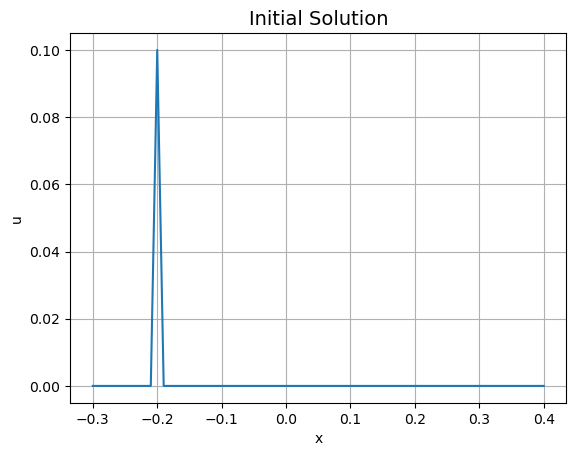

In [14]:
u2 = np.zeros((nt2,nx2))
u2 = u_init_2(u2,x2,x_centre_2,height_2,width_2)

plt.title("Initial Solution",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x2,u2[0,:])
plt.grid()
plt.show()

Implementing the **FTBS** scheme &nbsp;$\implies$

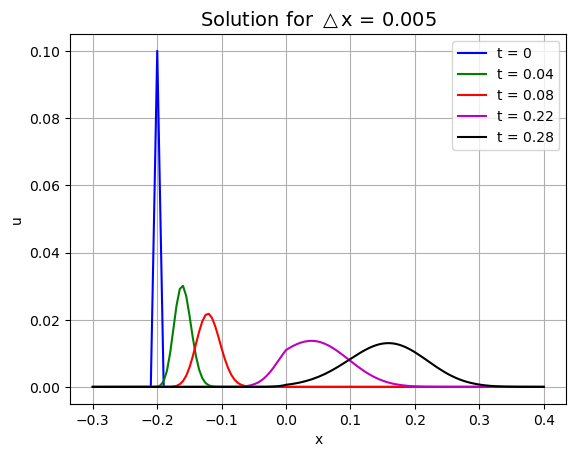

In [15]:
c2_1 = (dt2)/dx2                         # for points before origin
c2_2 = (2*dt2)/(dx2)                     # for points after origin

for i in range(nt2 - 1):
    for j in range(1,nx2):
        if (x2[j] <= 0):
            u2[i + 1, j] = (1 - c2_1) * u2[i,j] + (c2_1 * u2[i, j - 1])
        else :
            u2[i + 1, j] = (1 - c2_2) * u2[i,j] + (c2_2 * u2[i, j - 1])
            
plt.title(rf"Solution for $\triangle$x = {dx2}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x2,u2[0,:],c = 'b',label = 't = 0')
plt.plot(x2,u2[40,:],c = 'g',label = 't = 0.04')
plt.plot(x2,u2[80,:],c = 'r',label = 't = 0.08')
plt.plot(x2,u2[220,:],c = 'm',label = 't = 0.22')
plt.plot(x2,u2[280,:],c = 'k',label = 't = 0.28')
plt.grid()
plt.legend()
plt.show()

**Observations**: <br>
When the origin is on the wave, the slope of **wave** is **discontinuous** due to difference in velocities. <br>
After crossing the origin, the **width increased** and **amplitude reduced**.

## Question 3

In [16]:
def u_init_3(u,x,centre,height,width):

    # initialisation
    
    left = centre - width/2  
    right = centre + width/2  
    i = (x >= left) & (x <= right)  
    
    u[0,i] = height * np.sin(np.pi * (x[i] - left) / width)
    return u

In [17]:
x_centre_3 = 0.5
width_3 = 0.1
height_3 = 0.5

x_start_3 = 0
x_end_3 = 0.7

dx3 = 0.01
nx3 = int(np.round(np.abs(x_end_3 - x_start_3)/dx3)) + 1

x3 = np.linspace(x_start_3,x_end_3,nx3)

t_start_3 = 0
t_end_3 = 0.4

dt3 = 0.04
nt3 = int(np.round((t_end_3 - t_start_3)/dt3)) + 1

t3 = np.linspace(t_start_3,t_end_3,nt3)

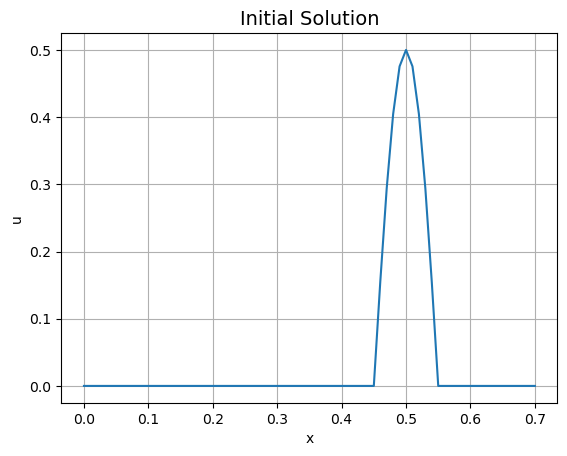

In [18]:
u3 = np.zeros((nt3,nx3))
u3 = u_init_3(u3,x3,x_centre_3,height_3,width_3)

plt.title("Initial Solution",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x3,u3[0,:])
plt.grid()
plt.show()

Using **Lax Friedrich** scheme $\implies$ \
&emsp;&emsp;&emsp;$\triangle x = 0.01$ \
&emsp;&emsp;&emsp;$\triangle t = 0.04$

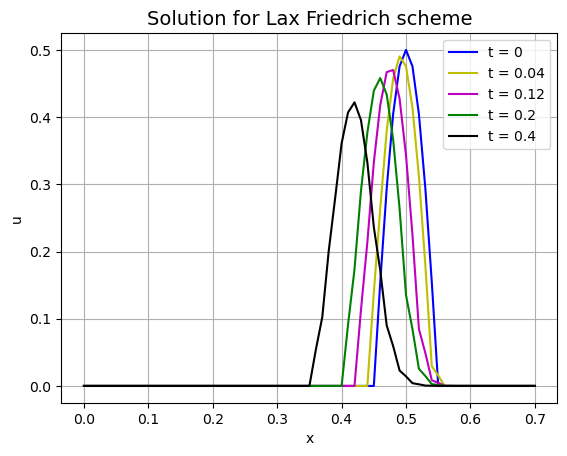

In [19]:
c3 = (-0.2*dt3)/dx3

for i in range(nt3 - 1):
    for j in range(1,nx3 - 1):
        u3[i + 1, j] = ((1 - c3)/2) * u3[i,j + 1] + ((1 + c3)/2) * u3[i,j - 1] 
        
plt.title("Solution for Lax Friedrich scheme",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x3,u3[0,:],c = 'b',label = 't = 0')
plt.plot(x3,u3[1,:],c = 'y',label = 't = 0.04')
plt.plot(x3,u3[3,:],c = 'm',label = 't = 0.12')
plt.plot(x3,u3[5,:],c = 'g',label = 't = 0.2')
plt.plot(x3,u3[10,:],c = 'k',label = 't = 0.4')
plt.legend()
plt.grid()
plt.show()

After 5 time steps, the **amplitude** is **reduced** and the **width increased**.

Using **FTFS** scheme :  

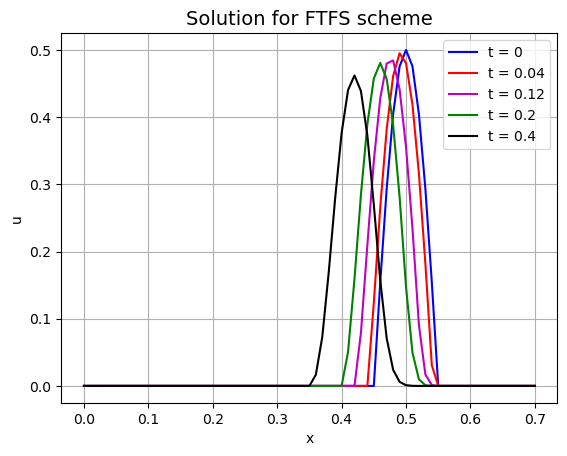

In [20]:
u3_ftfs = np.zeros((nt3,nx3))
u3_ftfs = u_init_3(u3,x3,x_centre_3,height_3,width_3)
u3_ftfs[:,nx3 - 1] = 0

for i in range(nt3 - 1):
    for j in range(nx3 - 1):
        u3_ftfs[i + 1,j] =  (1 - (0.2 * dt3)/(dx3)) * u3_ftfs[i,j] + ((0.2 * dt3)/(dx3)) * u3_ftfs[i,j + 1]

plt.title("Solution for FTFS scheme",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x3,u3_ftfs[0,:],c = 'b',label = 't = 0')
plt.plot(x3,u3_ftfs[1,:],c = 'r',label = 't = 0.04')
plt.plot(x3,u3_ftfs[3,:],c = 'm',label = 't = 0.12')
plt.plot(x3,u3_ftfs[5,:],c = 'g',label = 't = 0.2')
plt.plot(x3,u3[10,:],c = 'k',label = 't = 0.4')
plt.legend()
plt.grid()
plt.show()

The solution obtained for both the schemes is almost the same.

## Question 4
Solving the linear advection equation $$ \frac{\partial{u}}{\partial{t}} - 0.2\frac{\partial{u}}{\partial{x}} = 0$$ \
The function at the time $t = 0$ is given as : $$ u(x,0) = 50(x - 0.4)(x - 0.6)$$ where &ensp;$0.4 \leq x \leq 0.6$&ensp; and the value of $u$ is zero outside the interval. 

In [21]:
def exact_solution(x, t_fixed):
    x_shift = x + 0.2 * t_fixed
    u = np.zeros_like(x)
    
    mask = (x_shift >= 0.4) & (x_shift <= 0.6)
    u[mask] = 50 * (x_shift[mask] - 0.4) * (0.6 - x_shift[mask])
    
    return u

In [22]:
x_start_4 = 0
x_end_4 = 0.8
dx4 = 0.01                                              # step size along x
nx4 = int(np.round((x_end_4 - x_start_4)/dx4)) + 1                 # number of points in space domain.

x4 = np.linspace(x_start_4,x_end_4,nx4)

t_final_4 = 0.8
dt4 = 0.04
nt4 = int(np.round(t_final_4/dt4)) + 1

t4 = np.linspace(0,t_final_4,nt4)

In [23]:
u4 = np.zeros((nt4,nx4))
u4[:,0] = 0

left_4 = int(np.round((0.4 - x_start_4)/dx4))
right_4 = int(np.round((0.6 - x_start_4)/dx4))

for i in range(left_4,right_4 + 1):
    u4[0,i] = -50 * (x4[i] - 0.4) * (x4[i] - 0.6)

for i in range(nt4 - 1):
    for j in range(1,nx4):
        u4[i + 1,j] =  (1 + (0.2 * dt4)/(dx4)) * u4[i,j] - ((0.2 * dt4)/(dx4)) * u4[i,j - 1]

In [24]:
u4_true_1 = exact_solution(x4, 0.0)
u4_true_2 = exact_solution(x4, 0.4)
u4_true_3 = exact_solution(x4, 0.8)

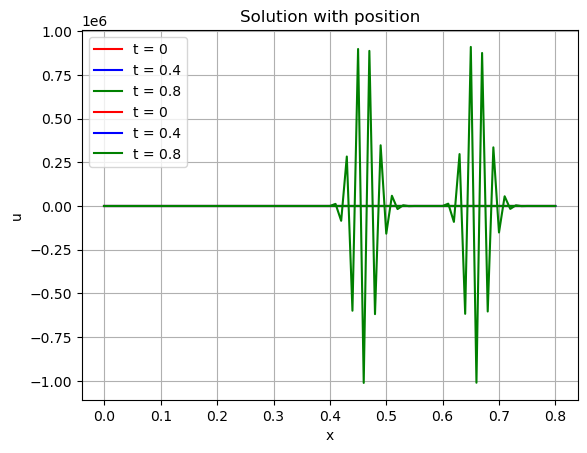

In [25]:
plt.title("Solution with position")
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x4,u4[0,:],c = 'r',label = 't = 0')
plt.plot(x4,u4[10,:],c = 'b',label = 't = 0.4')
plt.plot(x4,u4[20,:],c = 'g',label = 't = 0.8')
plt.plot(x4,u4_true_1,c = 'r',label = 't = 0')
plt.plot(x4,u4_true_2,c = 'b',label = 't = 0.4')
plt.plot(x4,u4_true_3,c = 'g',label = 't = 0.8')
plt.legend()
plt.grid()
plt.show()

Since the value of a is negaive, **FTBS** leads to instability.

For **FTFS**&nbsp; scheme :

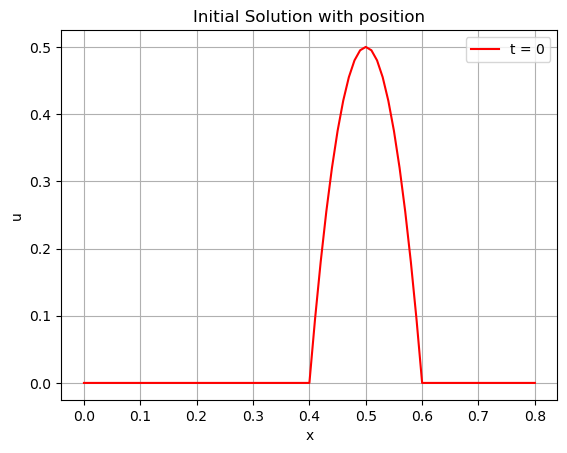

In [26]:
u4_ftfs = np.zeros((nt4,nx4))
u4_ftfs[:,nx4 - 1] = 0

left_4 = int(np.round((0.4 - x_start_4)/dx4))
right_4 = int(np.round((0.6 - x_start_4)/dx4))

for i in range(left_4, right_4):
    u4_ftfs[0,i] = -50 * (x4[i] - 0.4) * (x4[i] - 0.6)

plt.title("Initial Solution with position")
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x4,u4_ftfs[0,:],c = 'r',label = 't = 0')
plt.grid()
plt.legend()
plt.show()

for i in range(nt4 - 1):
    for j in range(nx4 - 1):
        u4_ftfs[i + 1,j] =  (1 - (0.2 * dt4)/(dx4)) * u4_ftfs[i,j] + ((0.2 * dt4)/(dx4)) * u4_ftfs[i,j + 1]

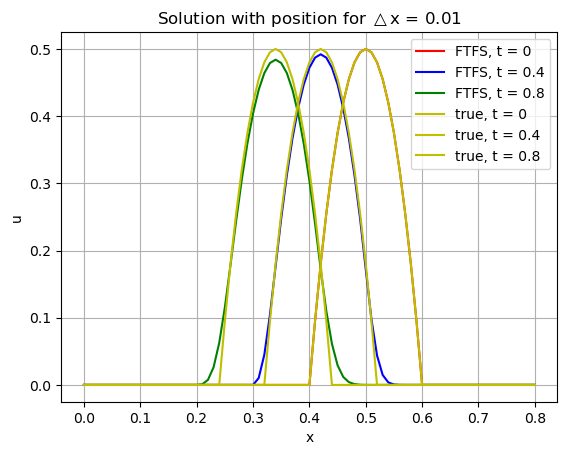

In [27]:
plt.title(rf"Solution with position for $\triangle$x = {dx4}")
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x4,u4_ftfs[0,:],c = 'r',label = 'FTFS, t = 0')
plt.plot(x4,u4_ftfs[10,:],c = 'b',label = 'FTFS, t = 0.4')
plt.plot(x4,u4_ftfs[20,:],c = 'g',label = 'FTFS, t = 0.8')
plt.plot(x4,u4_true_1,c = 'y',label = 'true, t = 0')
plt.plot(x4,u4_true_2,c = 'y',label = 'true, t = 0.4')
plt.plot(x4,u4_true_3,c = 'y',label = 'true, t = 0.8')
plt.legend()
plt.grid()
plt.show()

For FTFS scheme, we can observe that the amplitude is slightly less due to the damping. 

Using **Crank Nicholson**&nbsp; scheme : 

In [28]:
u4_cn = np.zeros((nt4,nx4))

for i in range(left_4,right_4):
    u4_cn[0,i] = -50 * (x4[i] - 0.4) * (x4[i] - 0.6)

A4 = np.eye(nx4)
B4 = np.eye(nx4)
c4 = (0.2*dt4)/(dx4)

for i in range(nx4):
    if (i != 0 and i != (nx4 - 1)):
        A4[i,i - 1] = c/4
        B4[i,i - 1] = -c/4
        A4[i,i + 1] = -c/4
        B4[i,i + 1] = c/4
              
for i in range(nt4 - 1):
    constant = B4 @ (u4_cn[i,:].T)
    sol = np.linalg.solve(A4,constant)
    u4_cn[i + 1,:] = sol.T

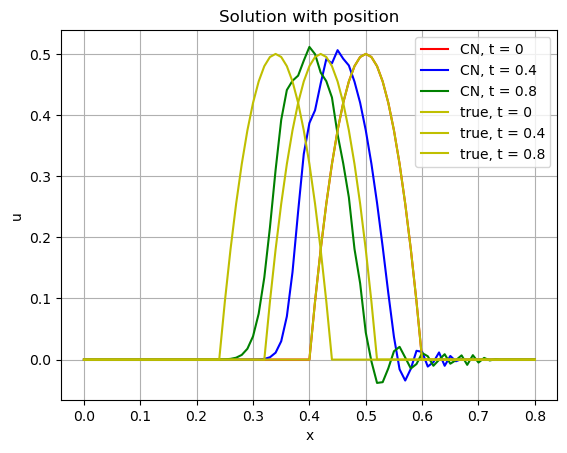

In [29]:
plt.title("Solution with position")
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x4,u4_cn[0,:],c = 'r',label = 'CN, t = 0')
plt.plot(x4,u4_cn[10,:],c = 'b',label = 'CN, t = 0.4')
plt.plot(x4,u4_cn[20,:],c = 'g',label = 'CN, t = 0.8')
plt.plot(x4,u4_true_1,c = 'y',label = 'true, t = 0')
plt.plot(x4,u4_true_2,c = 'y',label = 'true, t = 0.4')
plt.plot(x4,u4_true_3,c = 'y',label = 'true, t = 0.8')
plt.legend()
plt.grid()
plt.show()

For Crank Nicholson scheme, along with the oscillations at the wave edges, the peak is also slightly behind where it originally has to be.

## Question 5

In [30]:
dx5_1 = 0.001
nx5_1 = int(np.round(1/dx5_1)) + 1

dt5_1 = dx5_1/2
nt5_1 = int(np.round(1/dt5_1)) + 1

In [31]:
def u_init_5(u, x):
    u[:,0] = 1

    for i in range(len(x)):
        u[0,i] = ((np.cos((3 * np.pi * x[i])/2))**2) * np.exp(-2 * x[i])

    return u

In [32]:
x5_1 = np.linspace(0,1,nx5_1)
t5_1 = np.linspace(0,1,nt5_1)

u5_1 = np.zeros((nt5_1,nx5_1))
u5_1 = u_init_5(u5_1, x5_1)

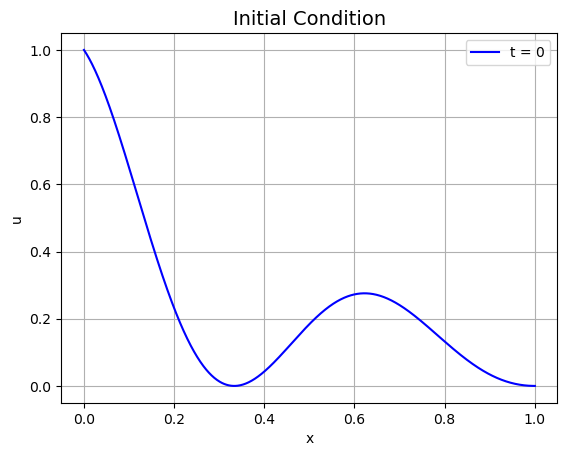

In [33]:
plt.title("Initial Condition",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x5_1,u5_1[0,:],c = 'b',label = 't = 0')
plt.legend()
plt.grid()
plt.show()

In [34]:
for i in range(nt5_1 - 1):
    for j in range(1,nx5_1):
        c = (dt5_1 * u5_1[i,j])/(dx5_1)
        u5_1[i + 1,j] = (1 - c) * u5_1[i,j] + c * u5_1[i,j - 1]

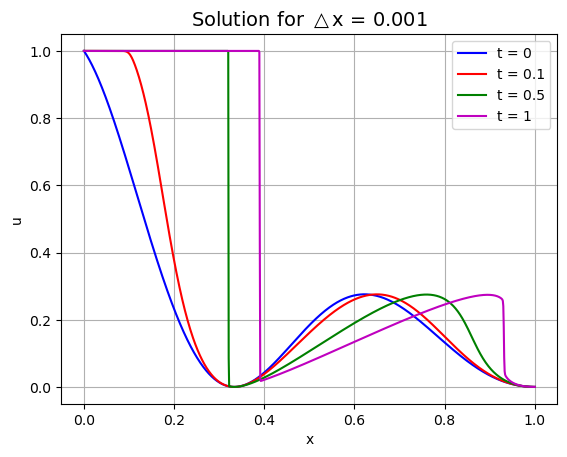

In [35]:
plt.title(rf"Solution for $\triangle$x = {dx5_1}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x5_1,u5_1[0,:],c = 'b',label = 't = 0')
plt.plot(x5_1,u5_1[200,:],c = 'r',label = 't = 0.1')
plt.plot(x5_1,u5_1[1000,:],c = 'g',label = 't = 0.5')
plt.plot(x5_1,u5_1[2000,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

For **dx = 0.002**&nbsp;:

In [36]:
dx5_2 = 0.002
nx5_2 = int(np.round(1/dx5_2)) + 1

dt5_2 = dx5_2/2
nt5_2 = int(np.round(1/dt5_2)) + 1

In [37]:
x5_2 = np.linspace(0,1,nx5_2)
t5_2 = np.linspace(0,1,nt5_2)

u5_2 = np.zeros((nt5_2,nx5_2))
u5_2 = u_init_5(u5_2, x5_2)

In [38]:
for i in range(nt5_2 - 1):
    for j in range(1,nx5_2):
        c = (dt5_2 * u5_2[i,j])/(dx5_2)
        u5_2[i + 1,j] = (1 - c) * u5_2[i,j] + c * u5_2[i,j - 1]

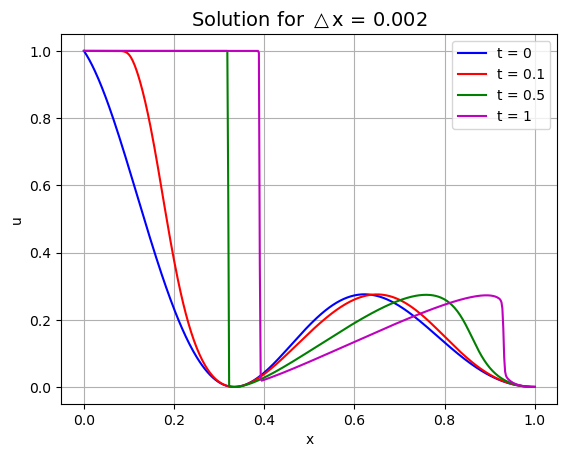

In [39]:
plt.title(rf"Solution for $\triangle$x = {dx5_2}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x5_2,u5_2[0,:],c = 'b',label = 't = 0')
plt.plot(x5_2,u5_2[100,:],c = 'r',label = 't = 0.1')
plt.plot(x5_2,u5_2[500,:],c = 'g',label = 't = 0.5')
plt.plot(x5_2,u5_2[1000,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

Using **dx = 0.0004**&nbsp;:

In [40]:
dx5_3 = 0.0004
nx5_3 = int(np.round(1/dx5_3)) + 1

dt5_3 = dx5_3/2
nt5_3 = int(np.round(1/dt5_3)) + 1

In [41]:
x5_3 = np.linspace(0,1,nx5_3)
t5_3 = np.linspace(0,1,nt5_3)

u5_3 = np.zeros((nt5_3,nx5_3))
u5_3 = u_init_5(u5_3, x5_3)

In [42]:
for i in range(nt5_3 - 1):
    for j in range(1,nx5_3):
        c = (dt5_3 * u5_3[i,j])/(dx5_3)
        u5_3[i + 1,j] = (1 - c) * u5_3[i,j] + c * u5_3[i,j - 1]

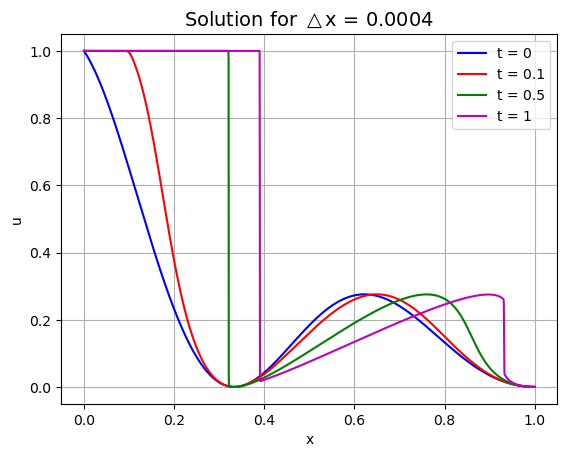

In [43]:
plt.title(rf"Solution for $\triangle$x = {dx5_3}",fontsize = 14)
plt.xlabel('x')
plt.ylabel('u')
plt.plot(x5_3,u5_3[0,:],c = 'b',label = 't = 0')
plt.plot(x5_3,u5_3[500,:],c = 'r',label = 't = 0.1')
plt.plot(x5_3,u5_3[2500,:],c = 'g',label = 't = 0.5')
plt.plot(x5_3,u5_3[5000,:],c = 'm',label = 't = 1')
plt.legend()
plt.grid()
plt.show()

**Observations**: <br>
Irrespective of chosen $\triangle x$, the solutions obtained are always the same.